# TASK 1 : Import Libraries

In [1]:
from tensorflow.keras.models import Sequential 
# Sequential is class in which we will be adding the different layers of the neural network 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense 
# Conv2D is used to sharpen the image
# MaxPooling2D helps in reducing the dimentionality of the image without compromising on the pixels
# Dropout is used to reduce overfitting of the image
# Flatten is used to flatten the 2D image into 1D array 
# Dense is a class of fully-connected neural network layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 
import numpy as np
import matplotlib.pyplot as plt 

# TASK 2 : Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 32.05 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
#set the path to the main dir
import os

main_dir = "/content/datasets/Data"

#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')

#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')


In [4]:
#print the filenames
print(os.listdir(train_covid_dir))

['COVID19(0).jpg', 'COVID-19 (5).jpg', 'COVID19(377).jpg', 'COVID19(460).jpg', 'COVID19(166).jpg', 'COVID19(412).jpg', 'COVID19(344).jpg', 'COVID19(214).jpg', 'COVID19(389).jpg', 'COVID19(38).jpg', 'COVID19(51).jpg', 'COVID19(244).jpg', 'COVID-19 (9).jpeg', 'COVID19(348).jpg', 'COVID19(241).jpg', 'COVID19(193).jpg', 'COVID19(319).jpg', 'COVID19(18).jpg', 'COVID19(469).jpg', 'COVID19(491).jpg', 'COVID19(135).jpg', 'COVID19(333).jpg', 'COVID19(436).jpg', 'COVID19(46).jpg', 'COVID19(192).jpg', 'COVID19(331).jpg', 'COVID19(176).jpg', 'COVID19(338).jpg', 'COVID19(546).jpg', 'COVID19(138).jpg', 'COVID19(467).jpg', 'COVID19(292).jpg', 'COVID19(510).jpg', 'COVID19(553).jpg', 'COVID19(6).jpg', 'COVID19(497).jpg', 'COVID19(119).jpg', 'COVID19(199).jpg', 'COVID19(282).jpg', 'COVID-19 (180).jpg', 'COVID-19 (336).jpg', 'COVID19(310).jpg', 'COVID19(222).jpg', 'COVID19(413).jpg', 'COVID-19 (15).jpg', 'COVID-19 (36).jpg', 'COVID-19 (195).jpg', 'COVID19(323).jpg', 'COVID19(116).jpg', 'COVID19(78).jpg',

In [5]:
#print the total no of images present in each dir
print("Total no. of images in TRAIN: {}".format(len(os.listdir(train_covid_dir)) + len(os.listdir(train_normal_dir))))#))

Total no. of images in TRAIN: 1811


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(0).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (5).jpg', '/content/datasets/Data/train/COVID19/COVID19(377).jpg', '/content/datasets/Data/train/COVID19/COVID19(460).jpg', '/content/datasets/Data/train/COVID19/COVID19(166).jpg', '/content/datasets/Data/train/COVID19/COVID19(412).jpg', '/content/datasets/Data/train/COVID19/COVID19(344).jpg', '/content/datasets/Data/train/COVID19/COVID19(214).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1448).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(427).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(694).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1286).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(374).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(991).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(615).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1268).jpg']


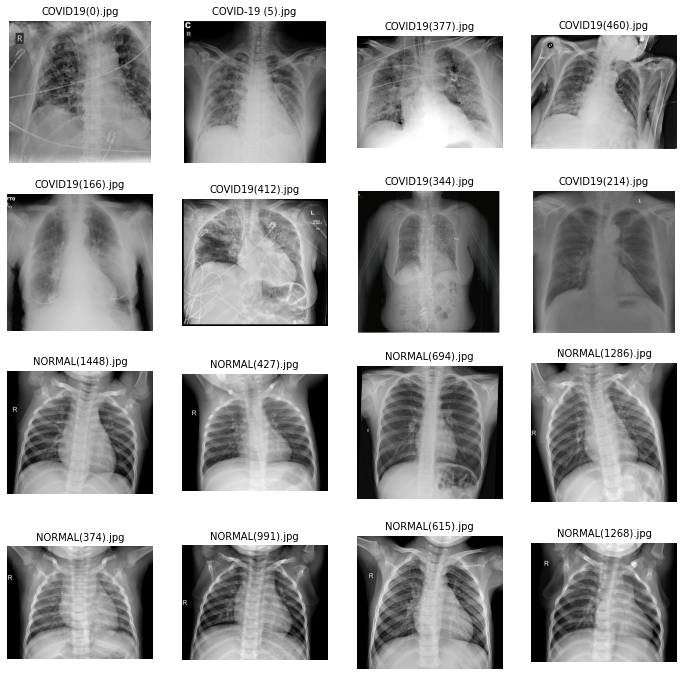

In [6]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows, cols = 4, 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12, 12)
#get the filenames from the covid & normal dir of the train dataset
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)
covid_pics = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pics = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pics)
print(normal_pics)
#merge the covid and normal list
merged_list = covid_pics + normal_pics
for i, img_path in enumerate(merged_list):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(rows, cols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [7]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

dgen_validation = ImageDataGenerator(
    rescale = 1./255
)

dgen_test = ImageDataGenerator(
    rescale = 1./255
)

train_generator = dgen_train.flow_from_directory(
    train_dir, 
    target_size = (150, 150),
    subset = 'training',
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = dgen_train.flow_from_directory(
    train_dir, 
    target_size = (150, 150),
    subset = 'validation',
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = dgen_test.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    # subset = 'testing',
    batch_size = 32,
    class_mode = 'binary'
)

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
#get the image shape

print("The dimensions of the training images are {} while it is {} for the testing images".format(train_generator.image_shape, test_generator.image_shape))

The dimensions of the training images are (150, 150, 3) while it is (150, 150, 3) for the testing images


# TASK 5 : Build Convolutional Neural Network Model

In [9]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32, (5, 5), padding='SAME', activation='relu', input_shape=(150, 150, 3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(32, (5, 5), padding='SAME', activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 32)        0

# TASK 6 : Compile & Train the Model

In [10]:
#compile the model
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
#train the model
history = model.fit(
    train_generator, 
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
46/46 [==============================] - 51s 1s/step - loss: 0.1769 - accuracy: 0.9344 - val_loss: 0.1721 - val_accuracy: 0.9475
Epoch 2/10
46/46 [==============================] - 52s 1s/step - loss: 0.1452 - accuracy: 0.9448 - val_loss: 0.2103 - val_accuracy: 0.9641
Epoch 3/10
46/46 [==============================] - 51s 1s/step - loss: 0.1305 - accuracy: 0.9551 - val_loss: 0.2261 - val_accuracy: 0.9420
Epoch 4/10
46/46 [==============================] - 50s 1s/step - loss: 0.1473 - accuracy: 0.9448 - val_loss: 0.1210 - val_accuracy: 0.9696
Epoch 5/10
46/46 [==============================] - 51s 1s/step - loss: 0.1347 - accuracy: 0.9565 - val_loss: 0.1395 - val_accuracy: 0.9751
Epoch 6/10
46/46 [==============================] - 51s 1s/step - loss: 0.1191 - accuracy: 0.9627 - val_loss: 0.0913 - val_accuracy: 0.9751
Epoch 7/10
46/46 [==============================] - 51s 1s/step - loss: 0.1426 - accuracy: 0.9427 - val_loss: 0.1414 - val_accuracy: 0.9420
Epoch 8/10
46/46 [==

# TASK 7 : Performance Evaluation

In [13]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

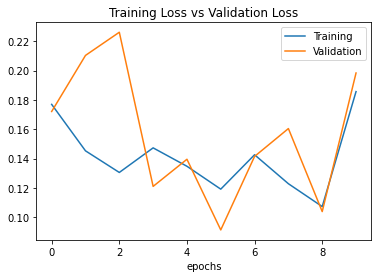

In [14]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training Loss vs Validation Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

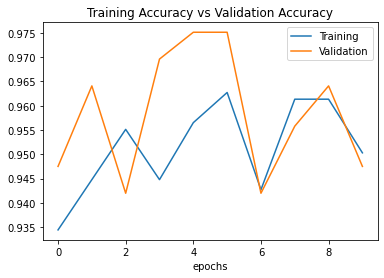

In [15]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('epochs')

In [16]:
# get the test acuarcy and loss
test_loss, test_accuracy = model.evaluate(test_generator)

16/16 [==============================] - 11s 716ms/step - loss: 0.1366 - accuracy: 0.9669


# TASK 8 : Prediction On New Data

In [21]:
from keras.preprocessing import image
prediction_dir = "/content/test_data/"
prediction_path = os.listdir(prediction_dir)
for f in prediction_path:
  # print(f)
  img_path = prediction_dir + f
  img = image.load_img(img_path, target_size=(150, 150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  pred = model.predict(images)
  print(f)

  if pred == 0:
    print("Covid19 POSITIVE!!")
  else:
    print("Covid19 Negative")



normal2.jpg
Covid19 Negative
normal1.jpg
Covid19 Negative
covid2.jpeg
Covid19 POSITIVE!!
covid1.jpg
Covid19 POSITIVE!!
